In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
uk_pord_df = pd.read_csv("/Users/adolfoartolamadrigal/Documents/Irohacks/Labs/week4/amz_uk_price_prediction_dataset.csv")

1. Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

Frequency Tables:

Generate a frequency table for the product category. 
1.  Which are the top 5 most listed product categories?
    
2. Visualizations:
    2.1 Hint:
        Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
        For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?
    Part 2: Delving into Product Pricing

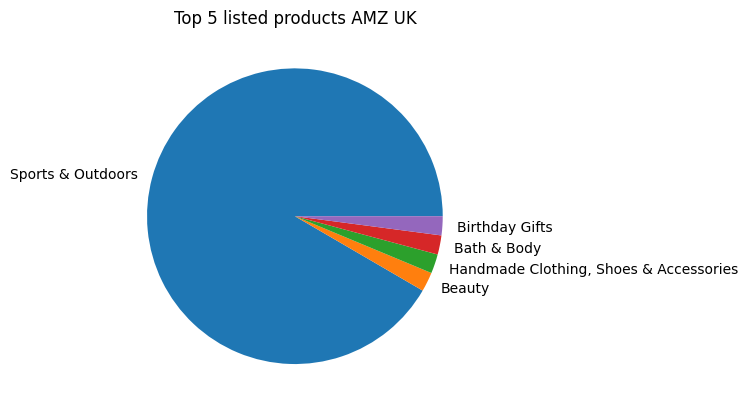

In [3]:
top_listed_categories = uk_pord_df['category'].sort_values(ascending=True).value_counts(normalize=True).head(5)

top_listed_categories = top_listed_categories.apply(lambda x:x/sum(top_listed_categories))

labels = [i for i in top_listed_categories.index]

plt.pie(top_listed_categories, labels=labels)
plt.title("Top 5 listed products AMZ UK")
plt.show()

2. Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

Measures of Centrality:

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?
Measures of Dispersion:

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?
Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.
Part 3: Unpacking Product Ratings

In [16]:
bins = [i for i in range(0,10001,1000)]
labels = [f'{bins[i]//1000}k - {bins[i+1]//1000}k' for i in range(len(bins)-1)]
uk_pord_df["price_range"] =pd.cut(uk_pord_df["price"],bins = bins, labels = labels)
price_range_counts = uk_pord_df["price_range"].value_counts(normalize=True)

bins

[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

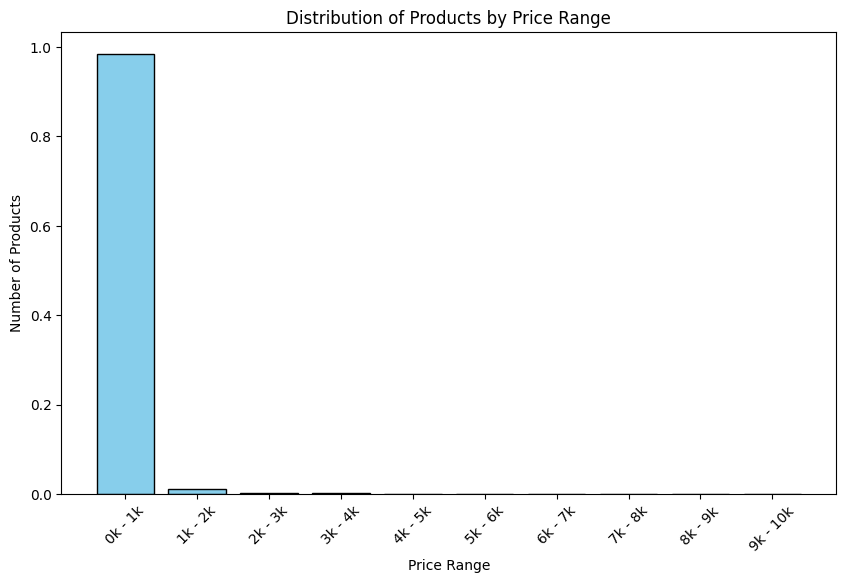

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(price_range_counts.index.astype(str), price_range_counts.values, color="skyblue", edgecolor="black")

# Add labels and title
plt.xlabel("Price Range")
plt.ylabel("Number of Products")
plt.title("Distribution of Products by Price Range")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the histogram
plt.show()

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [6]:
mean = uk_pord_df[["price"]].mean()
median = uk_pord_df[["price"]].median()
mode = uk_pord_df[["price"]].mode()
print(mean)
print(median)
print(mode)


price    89.243809
dtype: float64
price    19.09
dtype: float64
   price
0   9.99


3. Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?
Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?
Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?
Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?


category
3D Printers                       2.643145
3D Printing & Scanning            0.148267
Abrasive & Finishing Products     4.125200
Action Cameras                    1.281615
Adapters                          4.142520
                                    ...   
Wind Instruments                  2.026400
Window Treatments                 4.107950
Women                             4.169446
Women's Sports & Outdoor Shoes    3.937570
eBook Readers & Accessories       1.925610
Name: stars, Length: 296, dtype: float64

In [18]:
uk_pord_df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category,price_range
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers,0k - 1k
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers,0k - 1k
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers,0k - 1k
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers,0k - 1k
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers,0k - 1k
